# Which of these is a regression problem?

- Predicting the expected payout of an auto insurance claim given claim properties (car, accident type, driver prior history, etc.).

# Decision trees as base learners


In this exercise, your goal is to use trees as base learners. By default, XGBoost uses trees as base learners, so you don't have to specify that you want to use trees here with booster="`gbtree`".

In [5]:
import pandas as pd
churn_data = pd.read_csv("dataset/Churn.csv")
churn_data = churn_data.drop(["State",	"Phone", "Area_Code"], axis=1)
churn_data["Churn"] = churn_data["Churn"].apply(lambda val: 1 if val == "yes" else 0)
churn_data["Intl_Plan"] = churn_data["Intl_Plan"].apply(lambda val: 1 if val == "yes" else 0)
churn_data["Vmail_Plan"] = churn_data["Vmail_Plan"].apply(lambda val: 1 if val == "yes" else 0)

# Import xgboost
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split

# Create arrays for the features and the target: X, y
# X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]
X, y = churn_data.drop("Night_Calls", axis=1), churn_data["Night_Calls"]
X


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,8.41,3,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,0,1,77,26.55,126,18.32,12.56,6,2.67
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,0,57,39.29,55,13.04,8.61,4,2.59
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,0,109,30.74,58,24.55,8.64,6,3.81
3331,184,0,213.8,159.6,139.2,5.0,2,0,1,0,105,36.35,84,13.57,6.26,10,1.35


In [6]:

from sklearn.metrics import mean_squared_error
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
params = {"objective":"reg:linear"}
xg_reg = xgb.XGBRegressor(params=params, n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 20.316630


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\xgboost\core.py:160: UserWarning: [12:31:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


# Linear base learners

Now that you've used trees as base models in XGBoost, let's use the other kind of base model that can be used with XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows you to create a regularized linear regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as `xgb.train()`

In [7]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(X_train, y_train)
DM_test =  xgb.DMatrix(X_test, y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 20.171538


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\xgboost\core.py:160: UserWarning: [12:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


# Evaluating model quality

It's now time to begin evaluating model quality.

Here, you will compare the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data. As in previous exercises, all necessary modules have been pre-loaded and the data is available in the DataFrame `df`.

In [8]:
# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=DM_train, params=params, nfold=4, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        19.213068        0.221310       19.474481       0.779570
1        19.054620        0.210150       19.521939       0.768164
2        18.896226        0.201076       19.558365       0.747597
3        18.727311        0.205963       19.579649       0.794325
4        18.653648        0.217564       19.613876       0.788883
4    19.613876
Name: test-rmse-mean, dtype: float64


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\xgboost\core.py:160: UserWarning: [12:40:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [9]:
# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=DM_train, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0       15.433426       0.233468      15.628180      0.757632
1       15.300199       0.231445      15.666998      0.755254
2       15.169432       0.221378      15.688304      0.753271
3       15.028525       0.221420      15.700149      0.791270
4       14.952957       0.236510      15.726452      0.788488
4    15.726452
Name: test-mae-mean, dtype: float64


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\xgboost\core.py:160: UserWarning: [12:41:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


# Using regularization in XGBoost

 you'll now vary the l2 regularization penalty - also known as "`lambda`" - and see its effect on overall model performance on the Ames housing dataset.

In [10]:
reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=DM_train, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2       rmse
0    1  19.523323
1   10  19.574267
2  100  19.501856


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\xgboost\core.py:160: UserWarning: [12:45:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


# Visualizing individual XGBoost trees

Now that you've used XGBoost to both build and evaluate regression as well as classification models, you should get a handle on how to visually explore your models. Here, you will visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset.

XGBoost has a `plot_tree()` function that makes this type of visualization easy. 

In [26]:
# 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\xgboost\core.py:160: UserWarning: [13:03:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


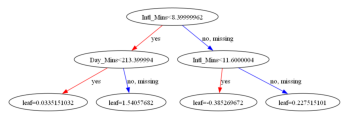

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=DM_train, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
# plot_tree(xg_reg) # Does not work for xgboost, need xgb's internal plot_tree method
plt.show()


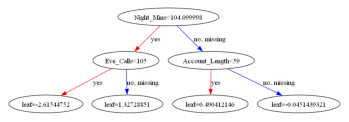

In [28]:

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()


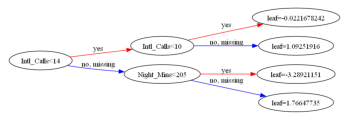

In [29]:

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR")
plt.show()

# Visualizing feature importances: What features are most important in my dataset

Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a `plot_importance()` function that allows you to do exactly this, and you'll get a chance to use it in this exercise!

c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\xgboost\core.py:160: UserWarning: [13:13:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


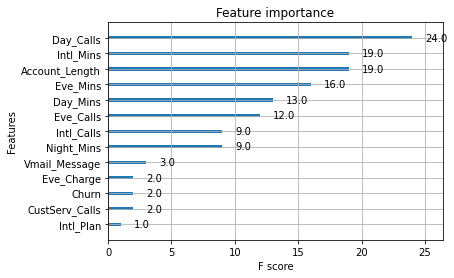

In [31]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X,y)

# Create the parameter dictionary: params
params = {"objective" : "reg:linear", "max_depth" : 4}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain= DM_train, num_boost_round= 10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()